In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("./Data/seattle-weather.csv")
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [35]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [36]:
df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [37]:
df.corr()

C:\Users\Basic\AppData\Local\Temp\ipykernel_9624\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


In [38]:
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

<BarContainer object of 5 artists>

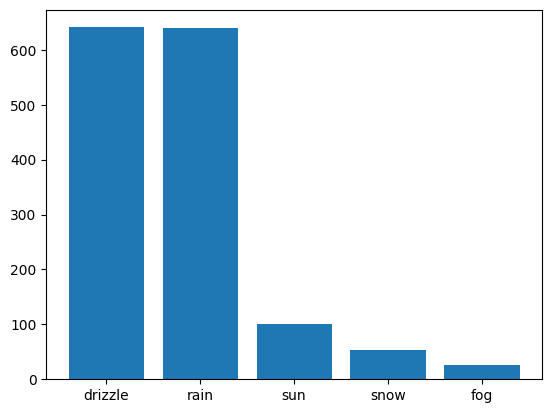

In [39]:
plt.bar(df['weather'].unique(),df['weather'].value_counts())

In [40]:
df.drop(columns=['date'],axis=1,inplace=True)

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
LE = LabelEncoder() 

In [42]:
df['weather'] =LE.fit_transform(df['weather'])

In [43]:
def SS(df):
    df.name = StandardScaler()
    return df.name,df.name.fit_transform(np.array(df).reshape(-1,1))

In [44]:
obj1,df['precipitation'] = SS(df['precipitation'])
obj2,df['temp_max'] = SS(df['temp_max'])
obj3,df['temp_min'] = SS(df['temp_min'])
obj4,df['wind'] = SS(df['wind'])

In [45]:
x = df[['precipitation','temp_max','temp_min','wind']]
y = df['weather']

In [46]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter=StratifiedShuffleSplit(n_splits=1,random_state=12)
for train,test in splitter.split(x,y):
    x_train = x.iloc[train]
    y_train = y.iloc[train]
    x_test = x.iloc[test]
    y_test = y.iloc[test]

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
y_pred = knc.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score,precision_score
ac = accuracy_score(y_test,y_pred)
print(ac)
pc = precision_score(y_test,y_pred,average='micro')
print(pc)

0.7346938775510204
0.7346938775510204


In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred2 = rfc.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score,precision_score
ac = accuracy_score(y_test,y_pred2)
print(ac)
pc = precision_score(y_test,y_pred2,average='micro')
print(pc)

0.8367346938775511
0.8367346938775511


In [51]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)
y_pred3 = svm.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score,precision_score
ac = accuracy_score(y_test,y_pred3)
print(ac)
pc = precision_score(y_test,y_pred3,average='micro')
print(pc)

0.7891156462585034
0.7891156462585034


In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4)
dtc.fit(x_train,y_train)
y_pred4 = dtc.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score,precision_score
ac = accuracy_score(y_test,y_pred4)
print(ac)
pc = precision_score(y_test,y_pred4,average='micro')
print(pc)

0.8639455782312925
0.8639455782312925


Checking Other Algos.

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

svc = SVC()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=4)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gdbt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

clfs = {
    'SVC': svc,
    'KN': knc,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gdbt,
    'xgb': xgb
}


def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    return accuracy, precision


accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(
        clf, x_train, y_train, x_test, y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores,
                               'Precision': precision_scores}).sort_values('Precision', ascending=False)
performance_df


c:\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Algorithm,Accuracy,Precision
2,DT,0.863946,0.863946
8,GBDT,0.863946,0.863946
4,RF,0.843537,0.843537
9,xgb,0.843537,0.843537
3,LR,0.829932,0.829932
7,ETC,0.829932,0.829932
6,Bgc,0.823129,0.823129
5,AdaBoost,0.795918,0.795918
0,SVC,0.789116,0.789116
1,KN,0.734694,0.734694
